# Music Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Read the artists.dat file

In [2]:
artists = pd.read_csv('artists.dat', sep='\t', usecols=['id', 'name'])
print('Artists dataframe head:')
print(artists.head())

Artists dataframe head:
   id               name
0   1       MALICE MIZER
1   2    Diary of Dreams
2   3  Carpathian Forest
3   4       Moi dix Mois
4   5        Bella Morte


###  Read the tags.dat file

In [3]:
tags= pd.read_csv('tags.dat', sep='\t', usecols=['tagID', 'tagValue'], encoding='latin1')
print('Tags dataframe head:')
print(tags.head())

Tags dataframe head:
   tagID           tagValue
0      1              metal
1      2  alternative metal
2      3          goth rock
3      4        black metal
4      5        death metal


### Read the user_artists.dat file

In [4]:
user_artists= pd.read_csv('user_artists.dat', sep='\t', usecols=['userID', 'artistID', 'weight'])
print('User-Artists dataframe head:')
print(user_artists.head())

User-Artists dataframe head:
   userID  artistID  weight
0       2        51   13883
1       2        52   11690
2       2        53   11351
3       2        54   10300
4       2        55    8983


### Read the user_taggedartists.dat file

In [5]:
user_taggedartists= pd.read_csv('user_taggedartists.dat', sep='\t', usecols=['userID', 'artistID', 'tagID'])
print('User-TaggedArtists dataframe head:')
print(user_taggedartists.head())

User-TaggedArtists dataframe head:
   userID  artistID  tagID
0       2        52     13
1       2        52     15
2       2        52     18
3       2        52     21
4       2        52     41


In [6]:
user_taggedartists_timestamps = pd.read_csv('user_taggedartists-timestamps.dat', sep='\t')
user_taggedartists_timestamps.head()

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


### Read the user_friends.dat file

In [7]:
user_friends= pd.read_csv('user_friends.dat', sep='\t', usecols=['userID', 'friendID'])
print('User-Friends dataframe head:')
print(user_friends.head())

User-Friends dataframe head:
   userID  friendID
0       2       275
1       2       428
2       2       515
3       2       761
4       2       831


### Checking for Null Values

In [8]:
print(artists.isnull().sum())


id      0
name    0
dtype: int64


In [9]:
print(tags.isnull().sum())

tagID       0
tagValue    0
dtype: int64


In [10]:
print(user_artists.isnull().sum())

userID      0
artistID    0
weight      0
dtype: int64


In [11]:
print(user_taggedartists.isnull().sum())
print(user_taggedartists_timestamps.isnull().sum())
print(user_friends.isnull().sum())

userID      0
artistID    0
tagID       0
dtype: int64
userID       0
artistID     0
tagID        0
timestamp    0
dtype: int64
userID      0
friendID    0
dtype: int64


### Convert data types if required


In [12]:
user_taggedartists_timestamps['timestamp'] = pd.to_datetime(user_taggedartists_timestamps['timestamp'] / 1000, unit='s')


In [13]:
# Merge the user_artists_df with artists_df to get the artist name
user_artists_merged_df = pd.merge(user_artists, artists, how='left', left_on='artistID', right_on='id')
user_artists_merged_df.drop('id', axis=1, inplace=True)

# Merge the user_taggedartists_df with artists_df and tags_df to get the artist name and tag value
user_taggedartists_merged_df = pd.merge(user_taggedartists, artists, how='left', left_on='artistID', right_on='id')
user_taggedartists_merged_df.drop('id', axis=1, inplace=True)
user_taggedartists_merged_df = pd.merge(user_taggedartists_merged_df, tags, how='left', left_on='tagID', right_on='tagID')

# Merge the user_friends_df with itself to get the reciprocal friendships
user_friends_reciprocal_df = pd.merge(user_friends, user_friends.rename(columns={'userID': 'friendID', 'friendID': 'userID'}), how='inner', on=['userID', 'friendID'])

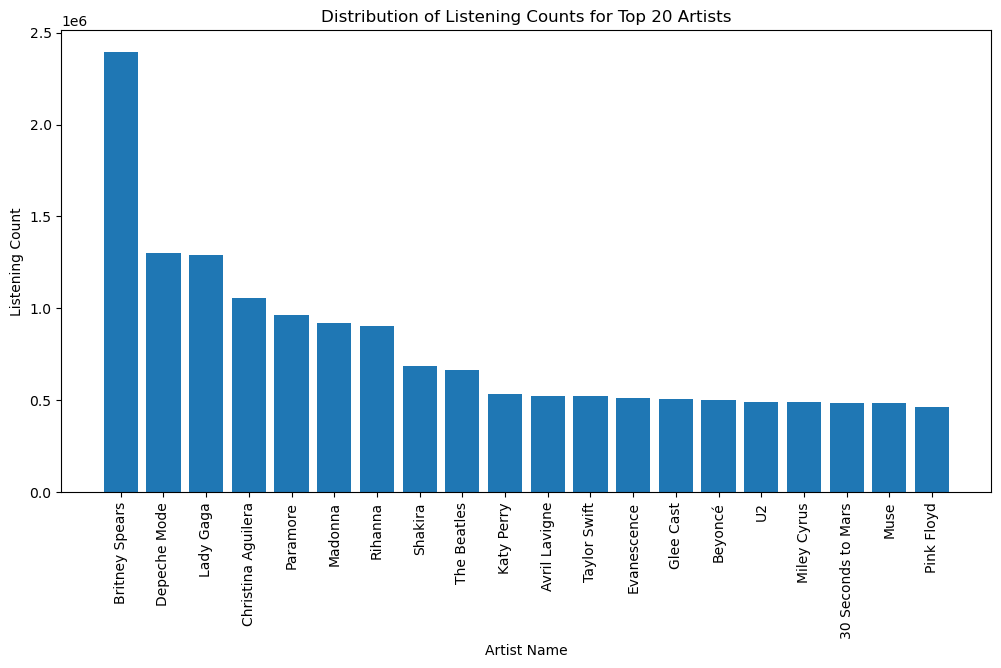

In [14]:
# Get the top 20 most listened artists
top_artists = user_artists_merged_df.groupby(['artistID', 'name']).sum().reset_index().sort_values('weight', ascending=False).head(20)

# Plot the distribution of listening counts for the top 20 artists
plt.figure(figsize=(12, 6))
plt.bar(top_artists['name'], top_artists['weight'])
plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Listening Count')
plt.title('Distribution of Listening Counts for Top 20 Artists')
plt.show()


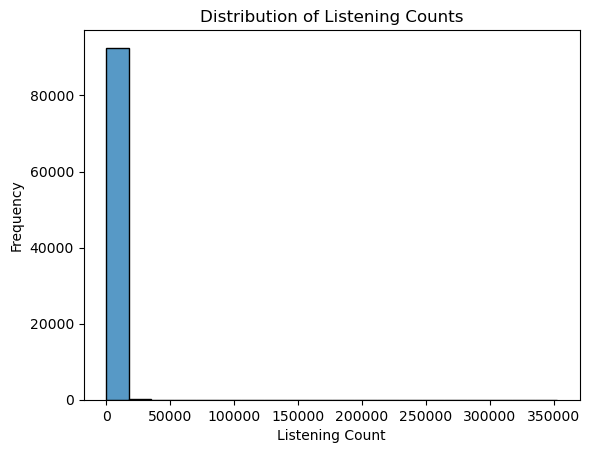

In [15]:

# Create a histogram of listening counts
sns.histplot(data=user_artists_merged_df, x='weight', bins=20)
plt.xlabel('Listening Count')
plt.ylabel('Frequency')
plt.title('Distribution of Listening Counts')
plt.show()


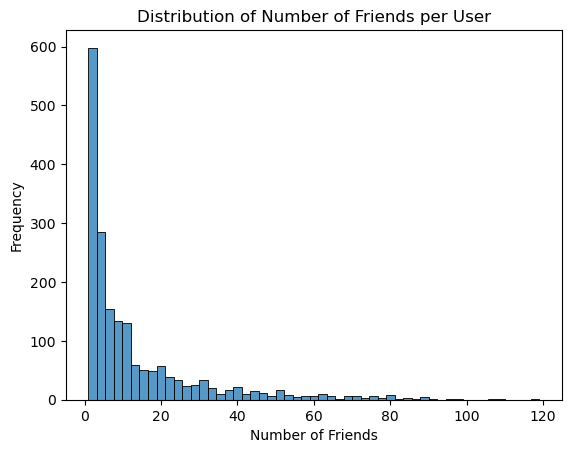

In [16]:
# Group user_friends_df by user ID and count the number of friends
num_friends_df= user_friends.groupby('userID').count()

# Create a histogram of number of friends
sns.histplot(data=num_friends_df, x='friendID')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Friends per User')
plt.show()


<AxesSubplot:>

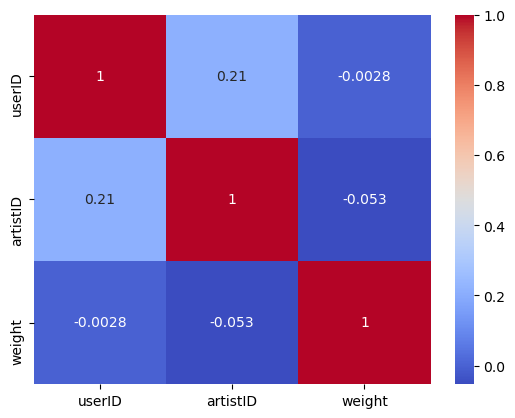

In [17]:
corr = user_artists_merged_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

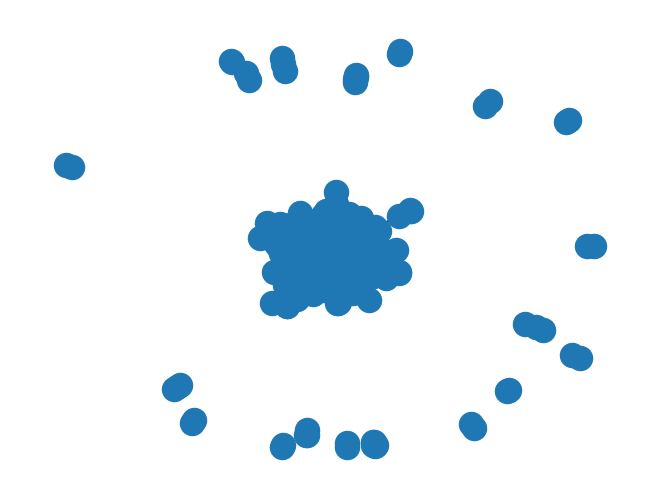

In [18]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(list(user_friends_reciprocal_df.values))
nx.draw(G, with_labels=False)
plt.show()

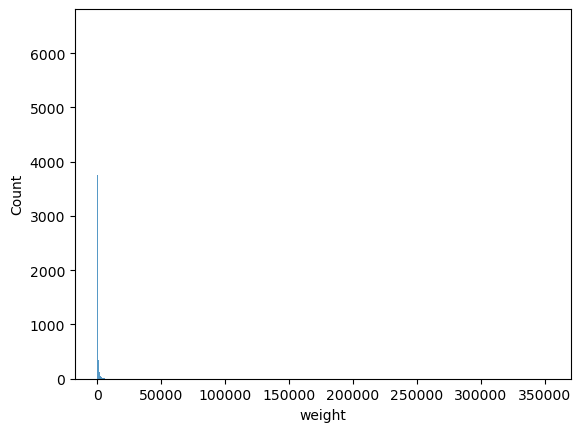

In [19]:
sns.histplot(data=user_artists_merged_df, x="weight")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Merge the user_artists_df with artists_df to get the artist name
user_artists_merged_df = pd.merge(user_artists, artists, how='left', left_on='artistID', right_on='id')
user_artists_merged_df.drop('id', axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test = train_test_split(user_artists_merged_df, test_size=0.2, random_state=42)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assume that we have a trained model that can predict ratings
y_pred = model.predict(X_test[['userID', 'artistID']])

# Extract the actual ratings from the test set
y_true = X_test['weight']

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


NameError: name 'model' is not defined